# Importing necessary Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Importing the dataset

In [37]:
df = pd.read_csv('Census Income')

In [38]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Exploratory Data Analysis(EDA)

In [40]:
df.shape

(32560, 15)

In [41]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [44]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

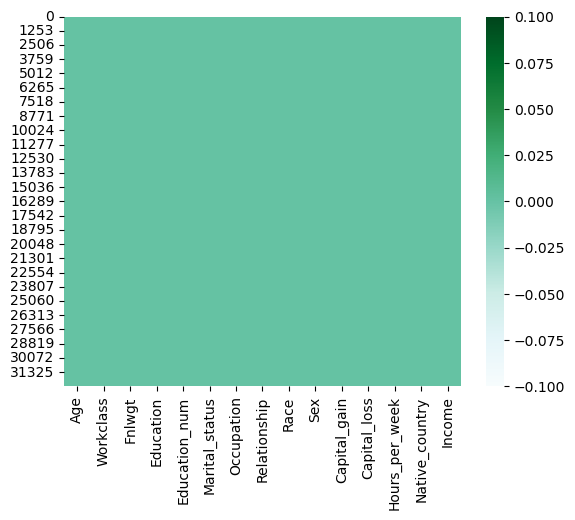

In [45]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuGn")
plt.show()

In [46]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [47]:
for i in df.columns:
    print(df[i].value_counts())
    print('=====================================================')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

In [48]:
# droping the columns having more number of 0's
df.drop('Capital_gain',axis=1,inplace=True)
df.drop('Capital_loss',axis=1,inplace=True)

In [49]:
df['Workclass']=df.Workclass.str.replace('?','Private')
df['Occupation']=df.Occupation.str.replace('?','Poof-speciality')
df['Native_country']=df.Native_country.str.replace('?','United-States')

In [50]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [51]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Poof-speciality      1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [52]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [53]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov' ],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc' ],' Pvt-Sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [54]:

df["Workclass"].value_counts()

 Pvt-Sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [55]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],' School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors'],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [56]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
 School               4253
 Post_Graduation      1723
 PhD                   413
Name: Education, dtype: int64

In [57]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [58]:

df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [59]:
# let's check the dataframe
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [60]:
# checking the list of value counts in Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [61]:
# checking wheather the dataset contains any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


# Description of Dataset

In [62]:
# statistical summary of dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [63]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [64]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Univariate Analysis

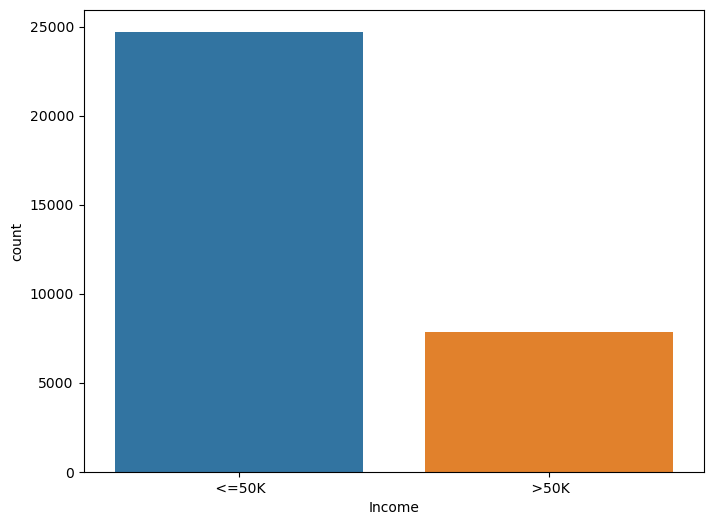

In [66]:
# Visualize the whether the income is above 50k or not
plt.figure(figsize=(8,6))
sns.countplot(x='Income',data=df)
plt.show()

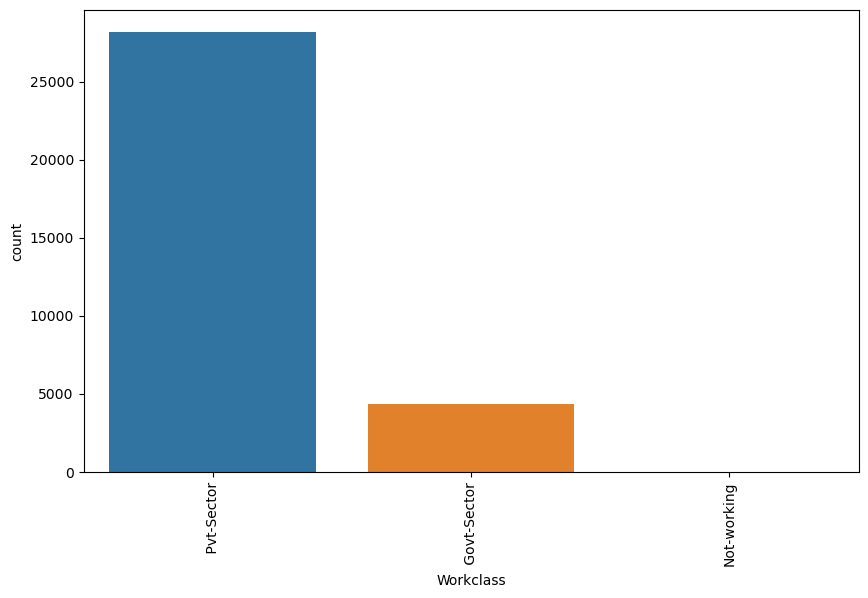

In [67]:
# visualize the count of workclass of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=90)
plt.show()

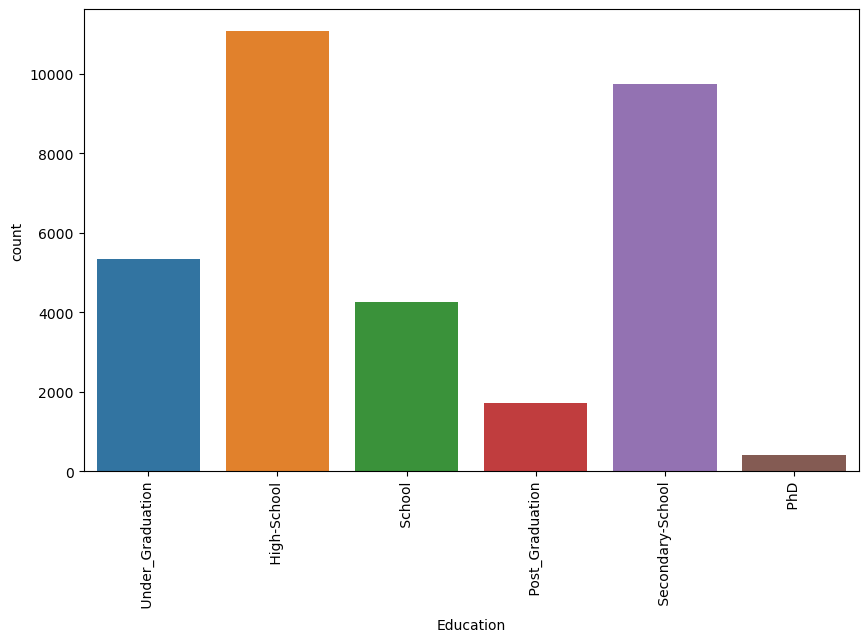

In [68]:
# visualize the count Education of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Education',data=df)
plt.xticks(rotation=90)
plt.show()

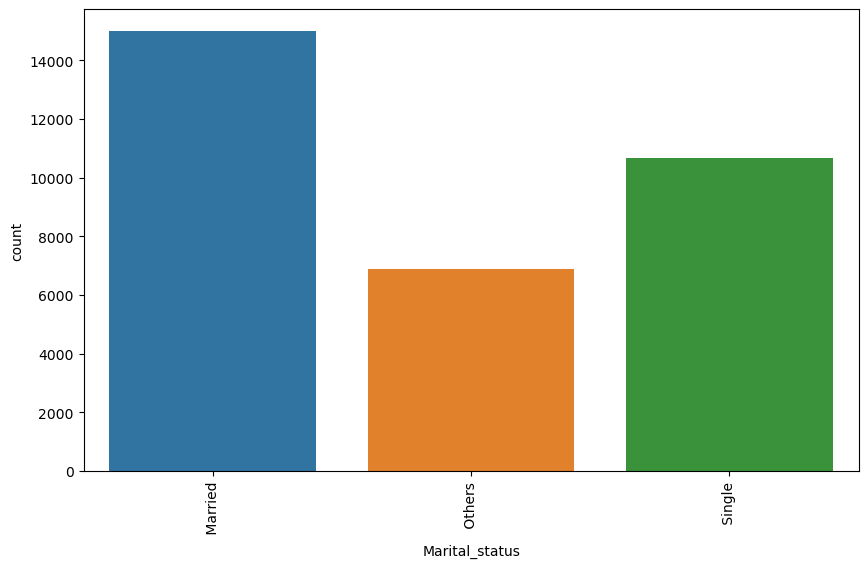

In [69]:
# visualize the marital status of the people
plt.figure(figsize=(10,6))
sns.countplot(x="Marital_status",data=df)
plt.xticks(rotation=90)
plt.show()

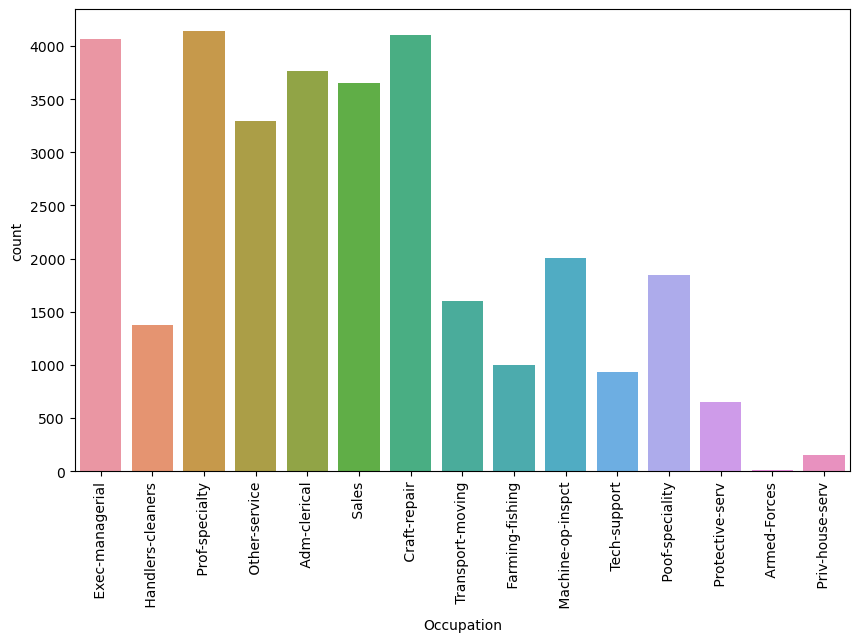

In [70]:
# visualize the count of Occupation of the people
plt.figure(figsize=(10,6))
sns.countplot(x="Occupation",data=df)
plt.xticks(rotation=90)
plt.show()

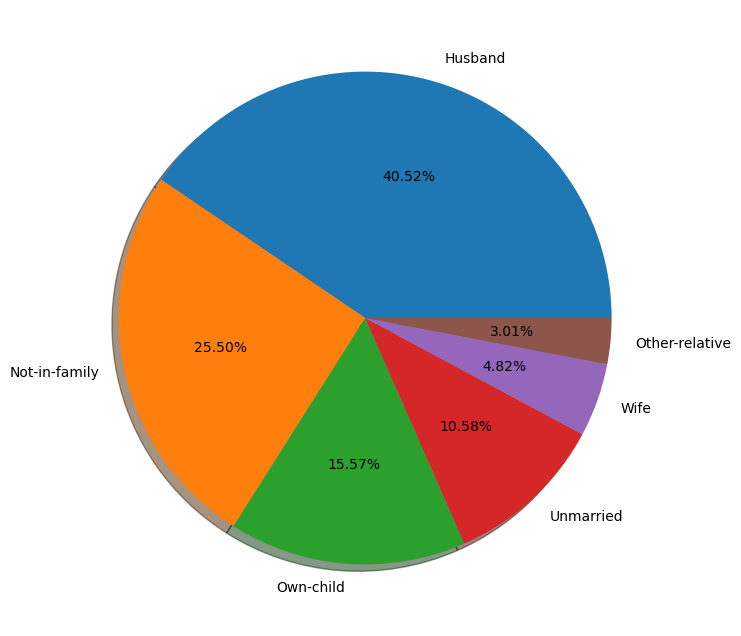

In [71]:
# visualize the count of Relationship of the people
labels = 'Husband', 'Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

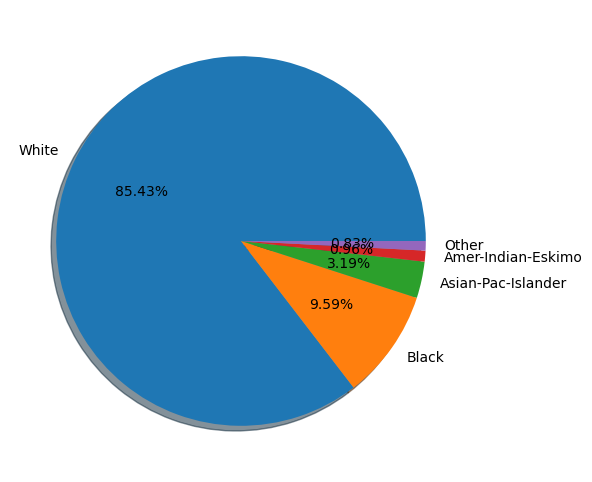

In [72]:
# visualize the count of Race of the people

labels='White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

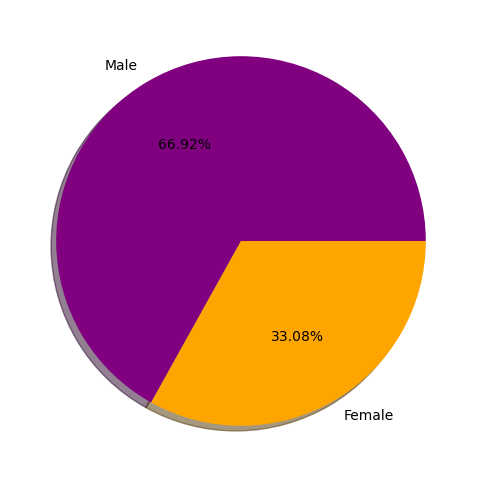

In [73]:
# visualize the count of Sex group of the people

labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,6))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()

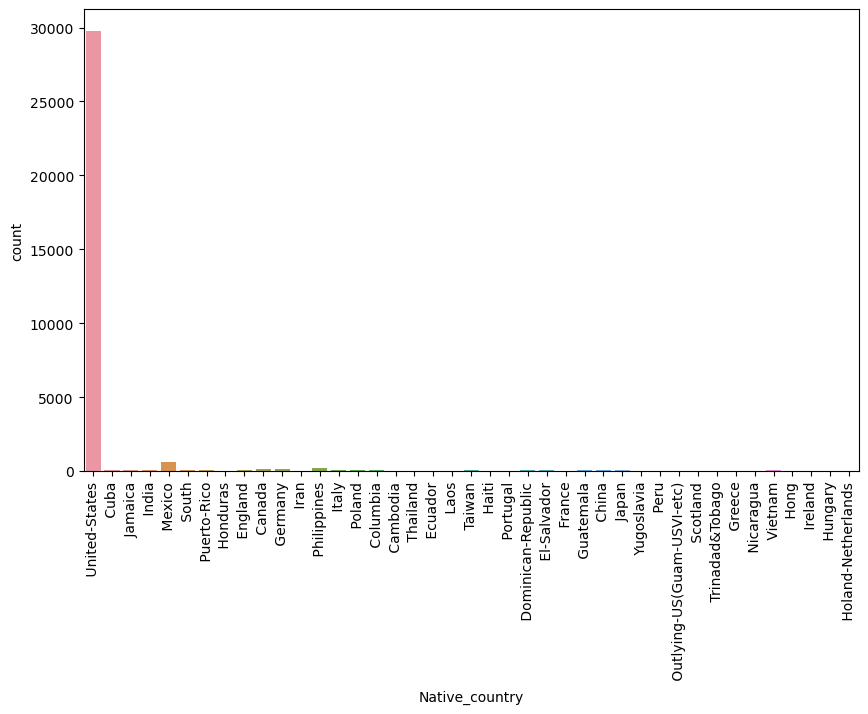

In [74]:
# visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Native_country',data=df)
plt.xticks(rotation=90)
plt.show()

# Plotting numerical columns

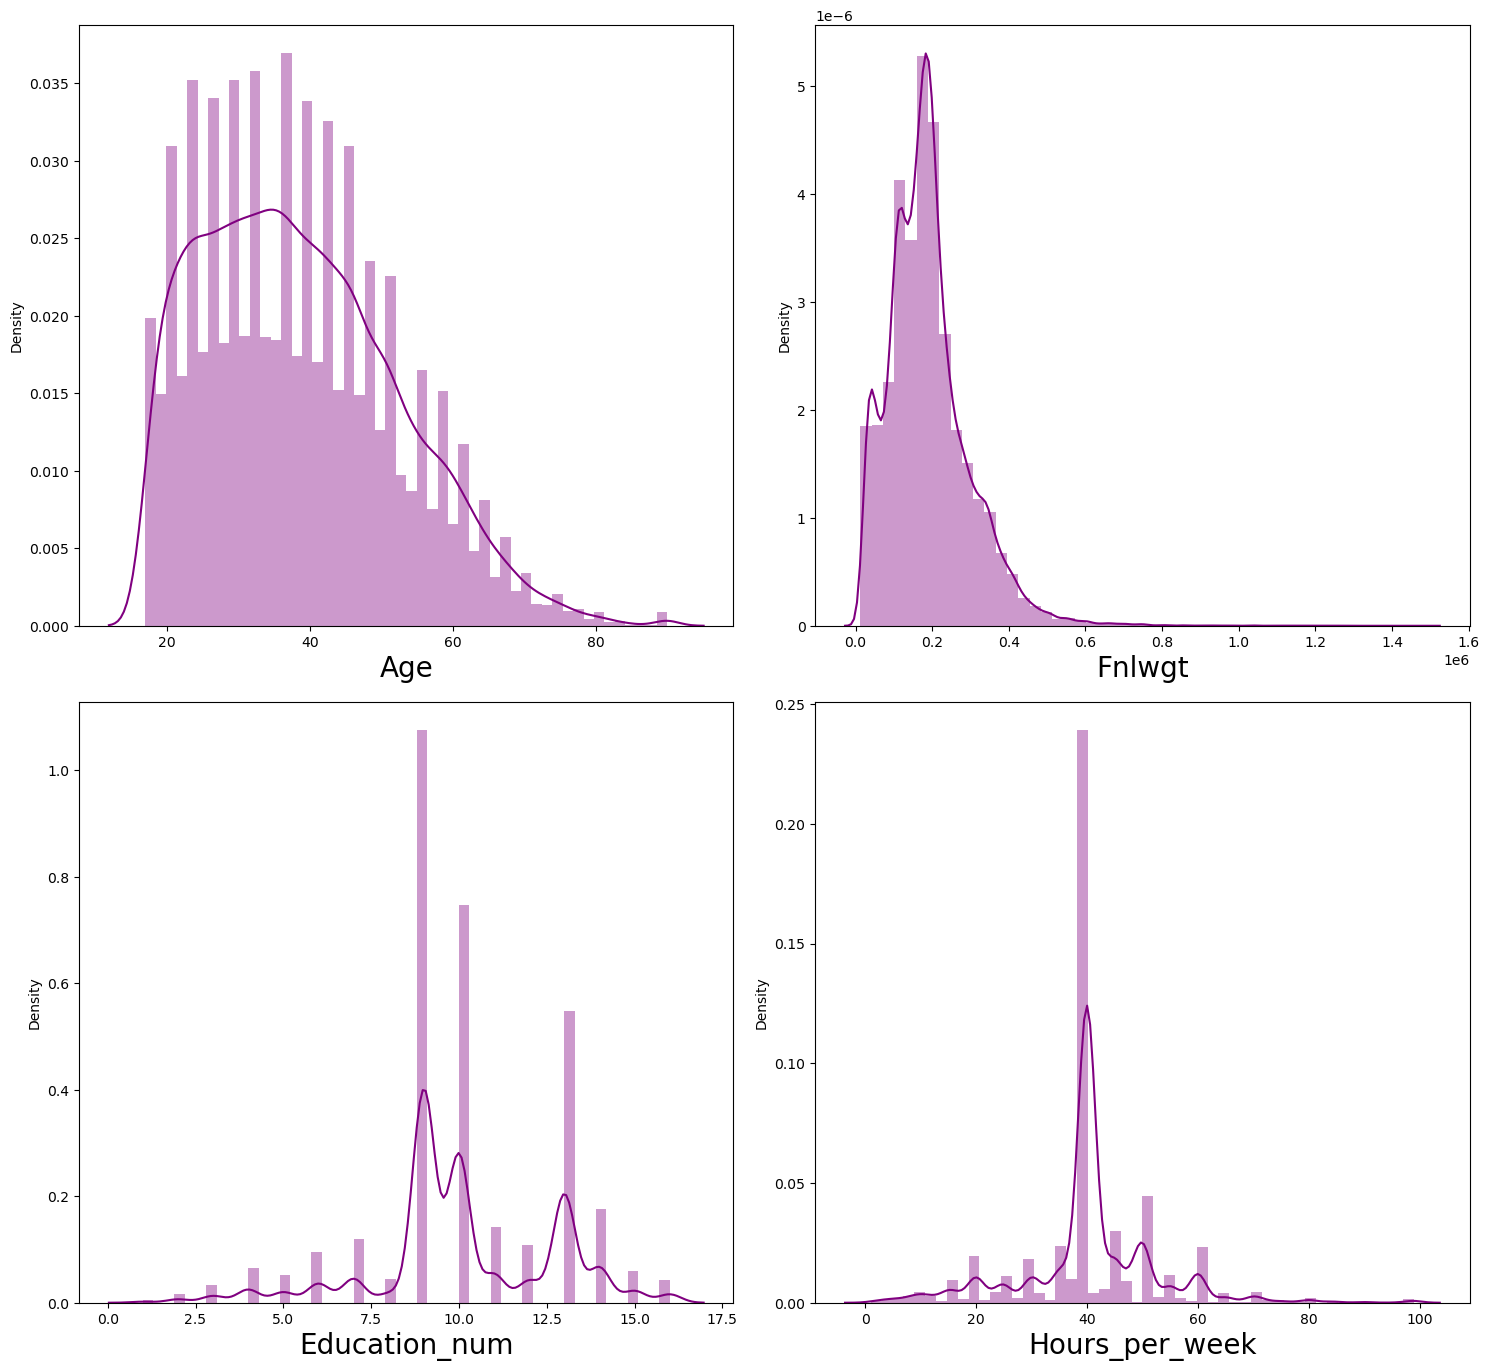

In [75]:
# checking how the data has been distributed in each column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color='purple')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis

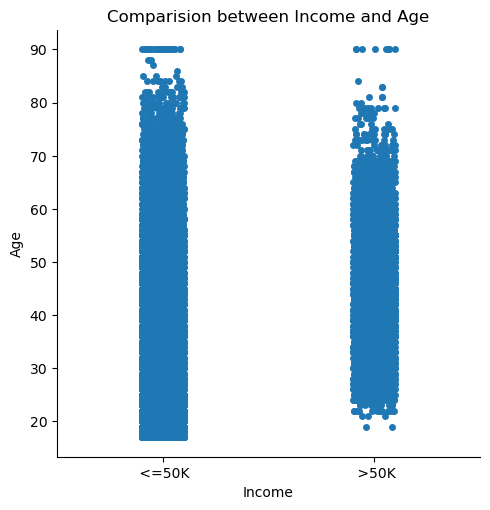

In [79]:
# visualizing the age of the people who have the income more
sns.catplot(x='Income',y='Age', data=df,kind='strip',size=5);
plt.title('Comparision between Income and Age')
plt.show()

# Final Weight

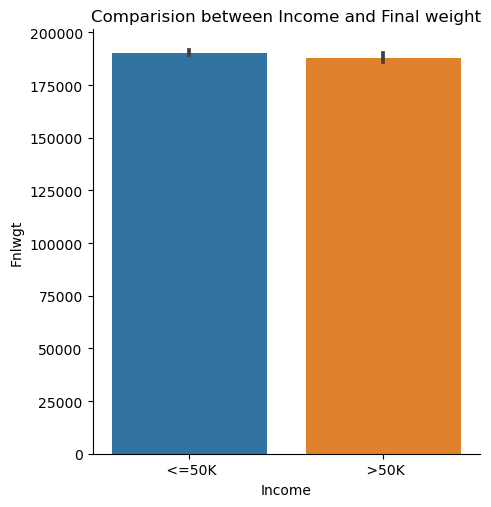

In [82]:
# visualizing the Final weight with income
sns.catplot(x='Income',y='Fnlwgt', data=df,kind='bar');
plt.title('Comparision between Income and Final weight')
plt.show()

# Education_num

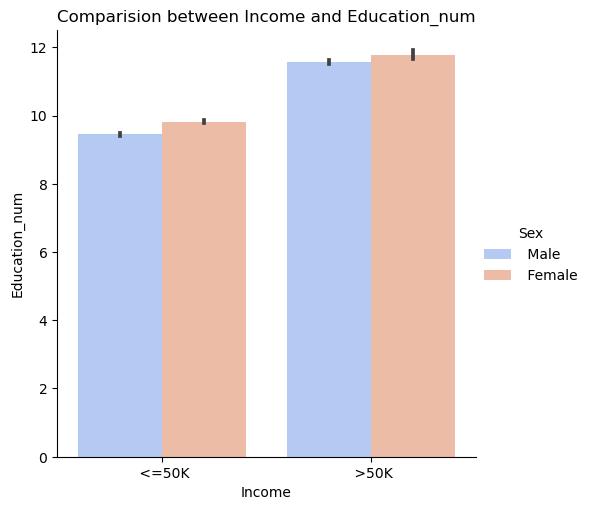

In [83]:
# visualizing the number of education with income
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="coolwarm")
plt.title("Comparision between Income and Education_num")
plt.show()

# Hour Per Week

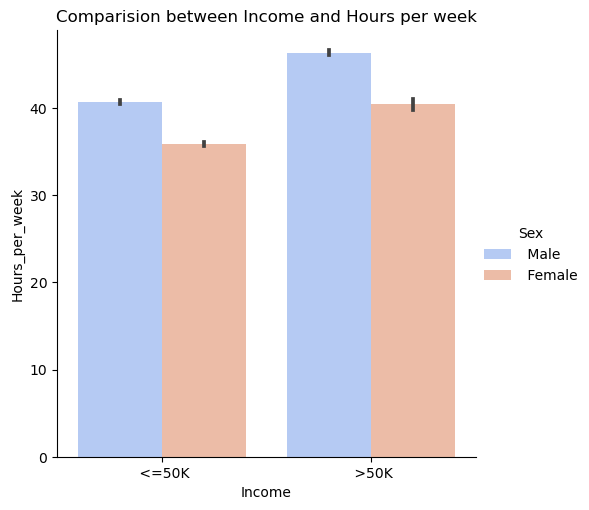

In [84]:
# visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar', hue='Sex',palette='coolwarm');
plt.title('Comparision between Income and Hours per week')
plt.show()

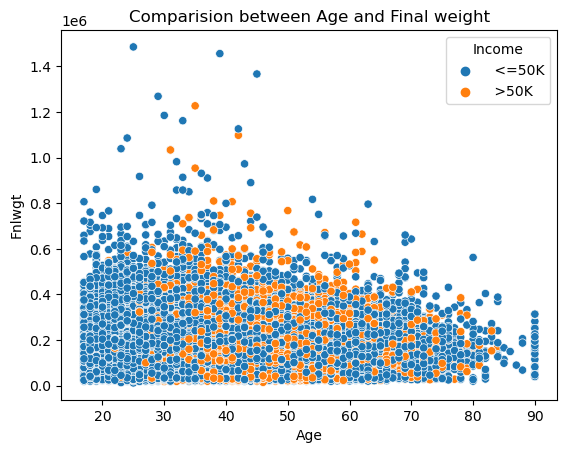

In [85]:
# visualizing how the income changes with work class of the people
sns.scatterplot(x='Age',y='Fnlwgt', data=df,hue='Income');
plt.title('Comparision between Age and Final weight')
plt.show()

# Workclass

<Figure size 1000x600 with 0 Axes>

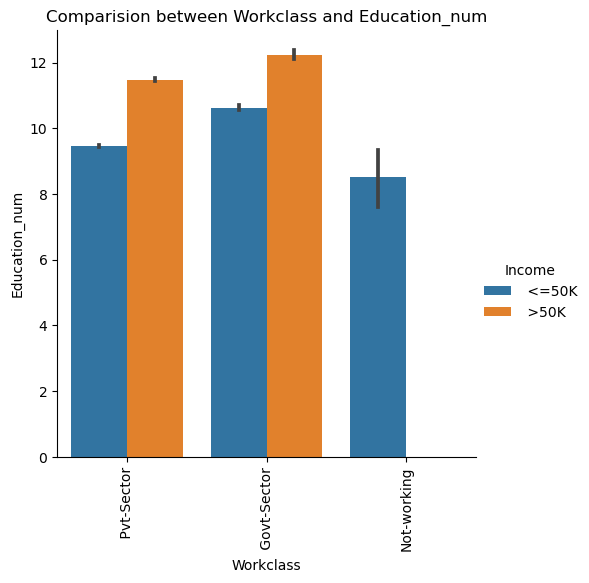

In [86]:
# visualizing how the income changes with work class of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Workclass',y='Education_num',data=df,kind='bar',hue='Income');
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

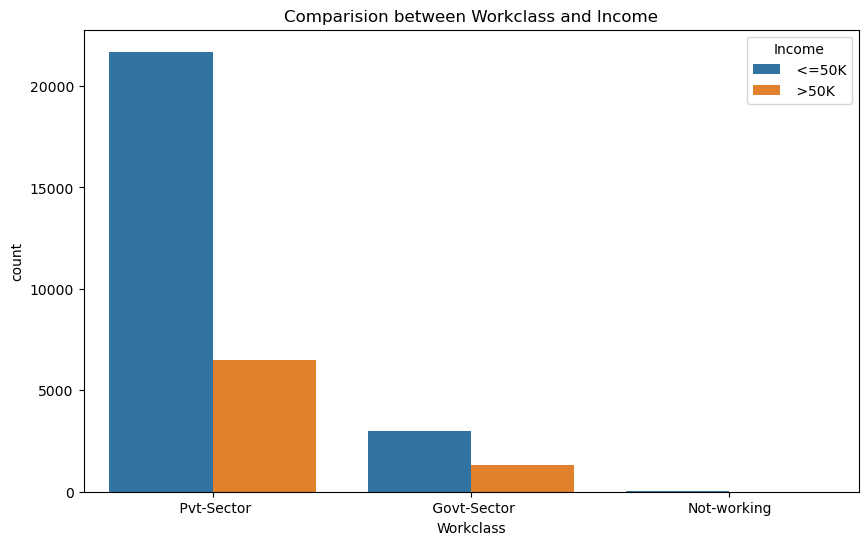

In [89]:
# visualizing the relation between work class and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Workclass',hue='Income',data=df)
plt.title('Comparision between Workclass and Income')
plt.show()

# Education

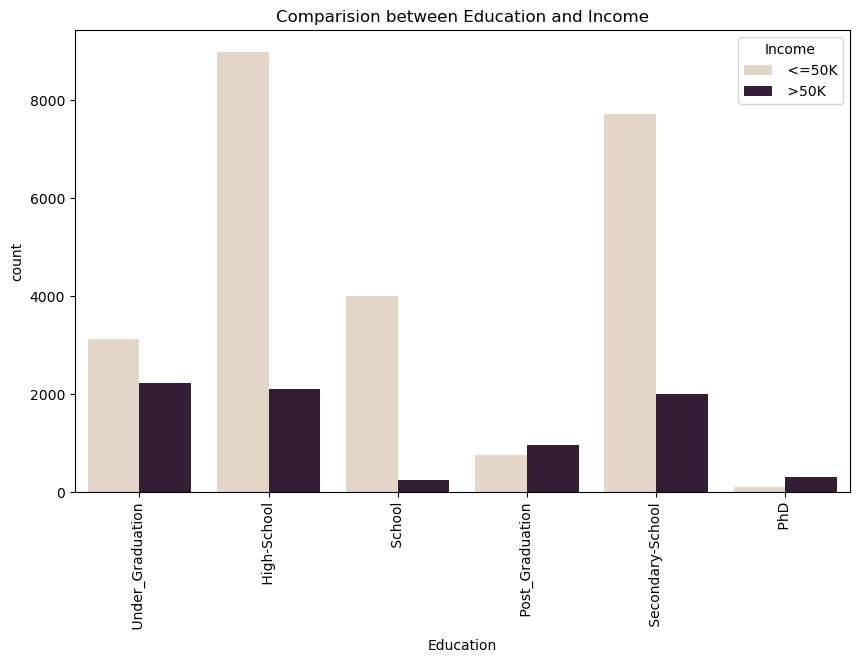

In [92]:
# visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Education',hue='Income',palette="ch:.25",data=df)
plt.title('Comparision between Education and Income')
plt.xticks(rotation=90)
plt.show()

# Marital_status

<Figure size 1000x600 with 0 Axes>

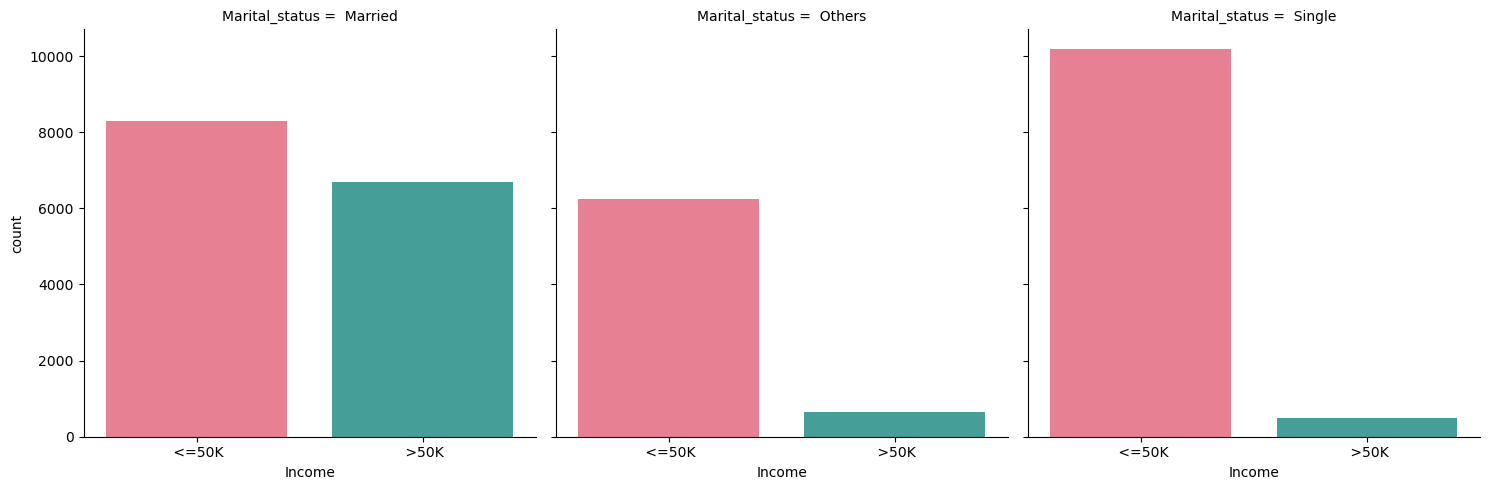

In [93]:
# visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income', col='Marital_status',data=df,kind='count',palette='husl')
plt.show()

# Occupation

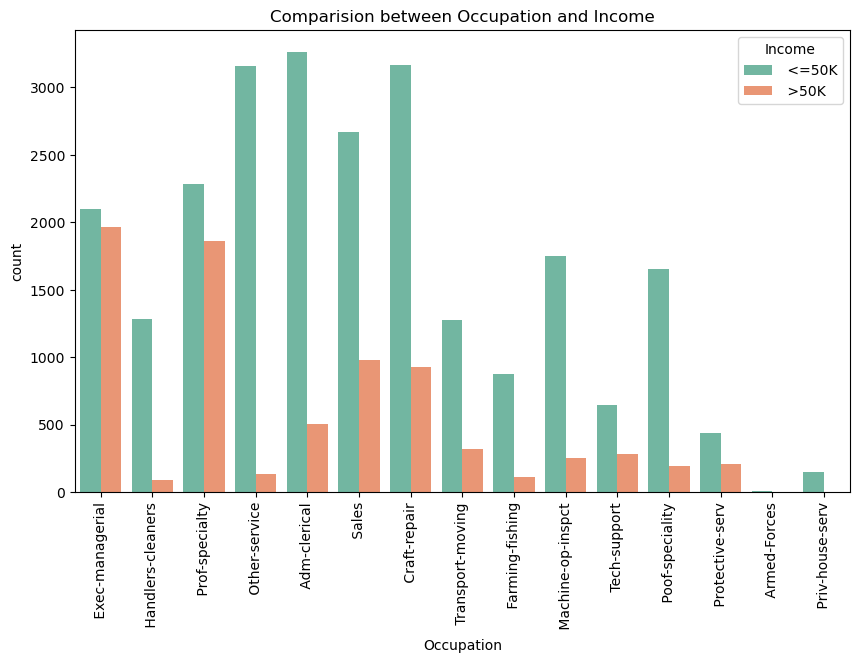

In [95]:
# visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Occupation',hue='Income',palette='Set2',data=df)
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

# Relationship

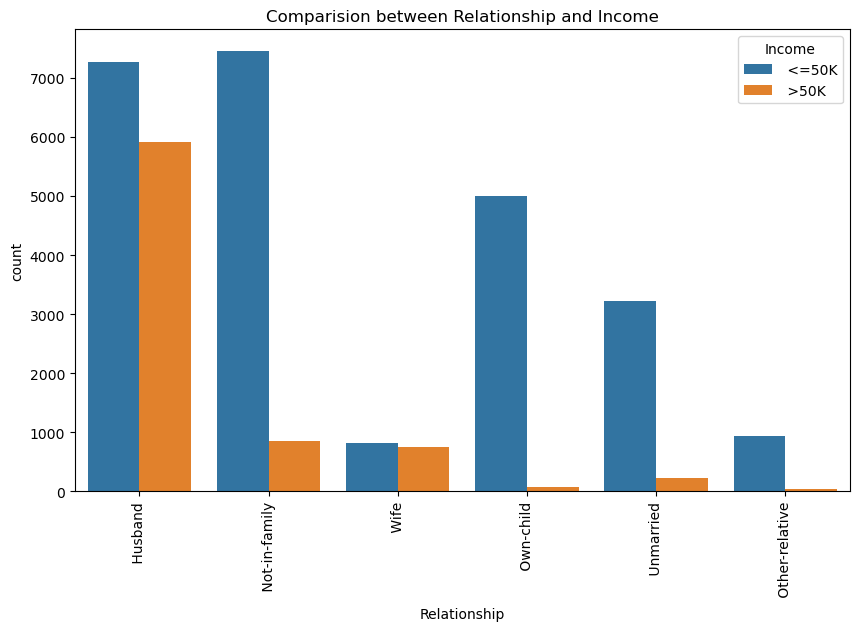

In [96]:
# visualizing the relation between Relationship and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.title('Comparision between Relationship and Income')
plt.xticks(rotation=90)
plt.show()

# Race

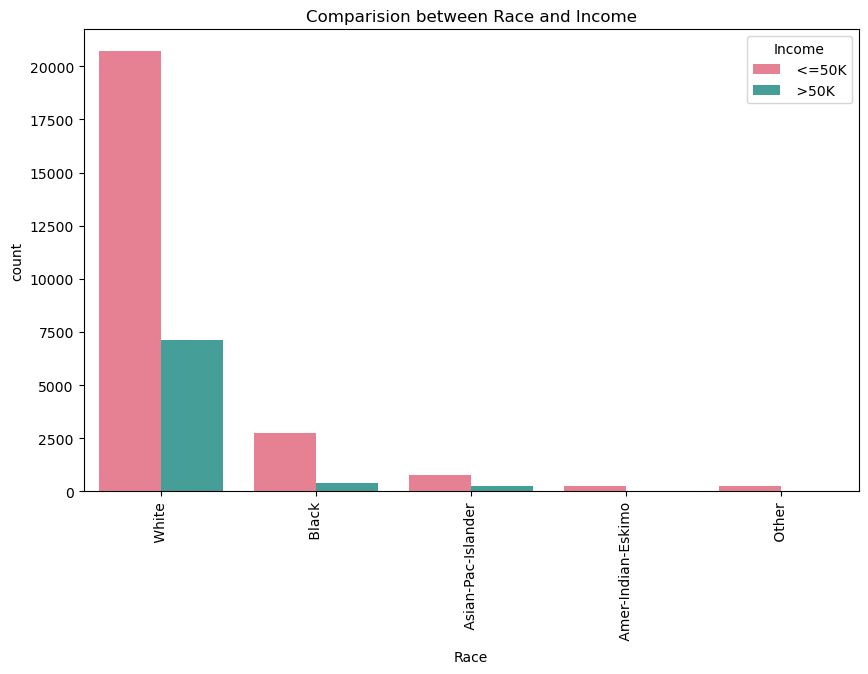

In [97]:
# visualizing the relation between Race and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Race',hue='Income',data=df,palette="husl")
plt.title('Comparision between Race and Income')
plt.xticks(rotation=90)
plt.show()

# Sex

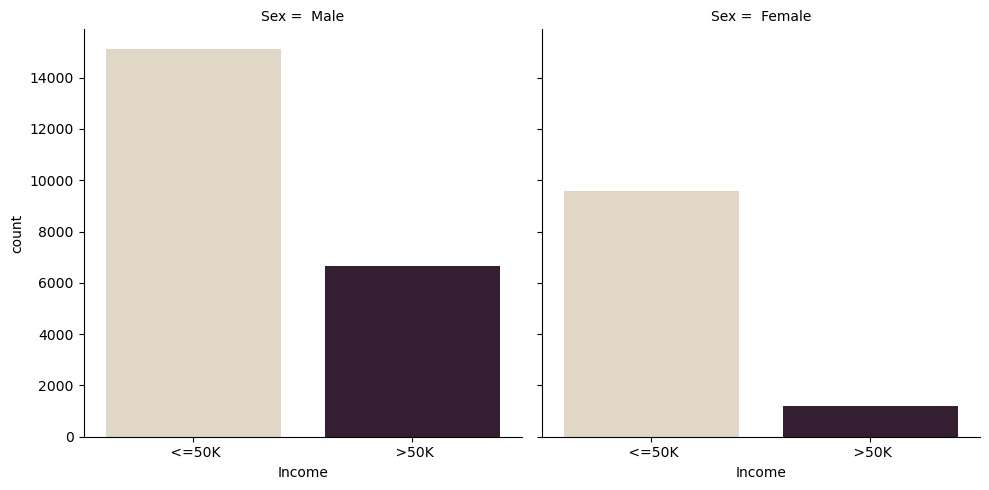

In [98]:
# visualizing the relation between Income and Sex groups of the people
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="ch:.28")
plt.show()

# Native country

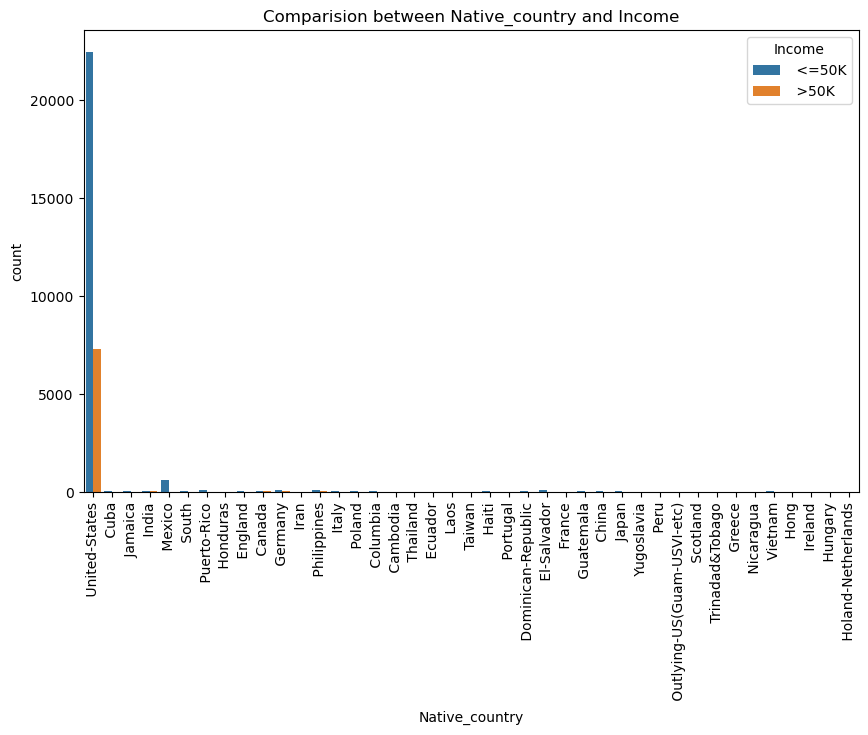

In [99]:
# visualizing the relation between Native country and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(x='Native_country',hue='Income',data=df)
plt.title('Comparision between Native_country and Income')
plt.xticks(rotation=90)
plt.show()

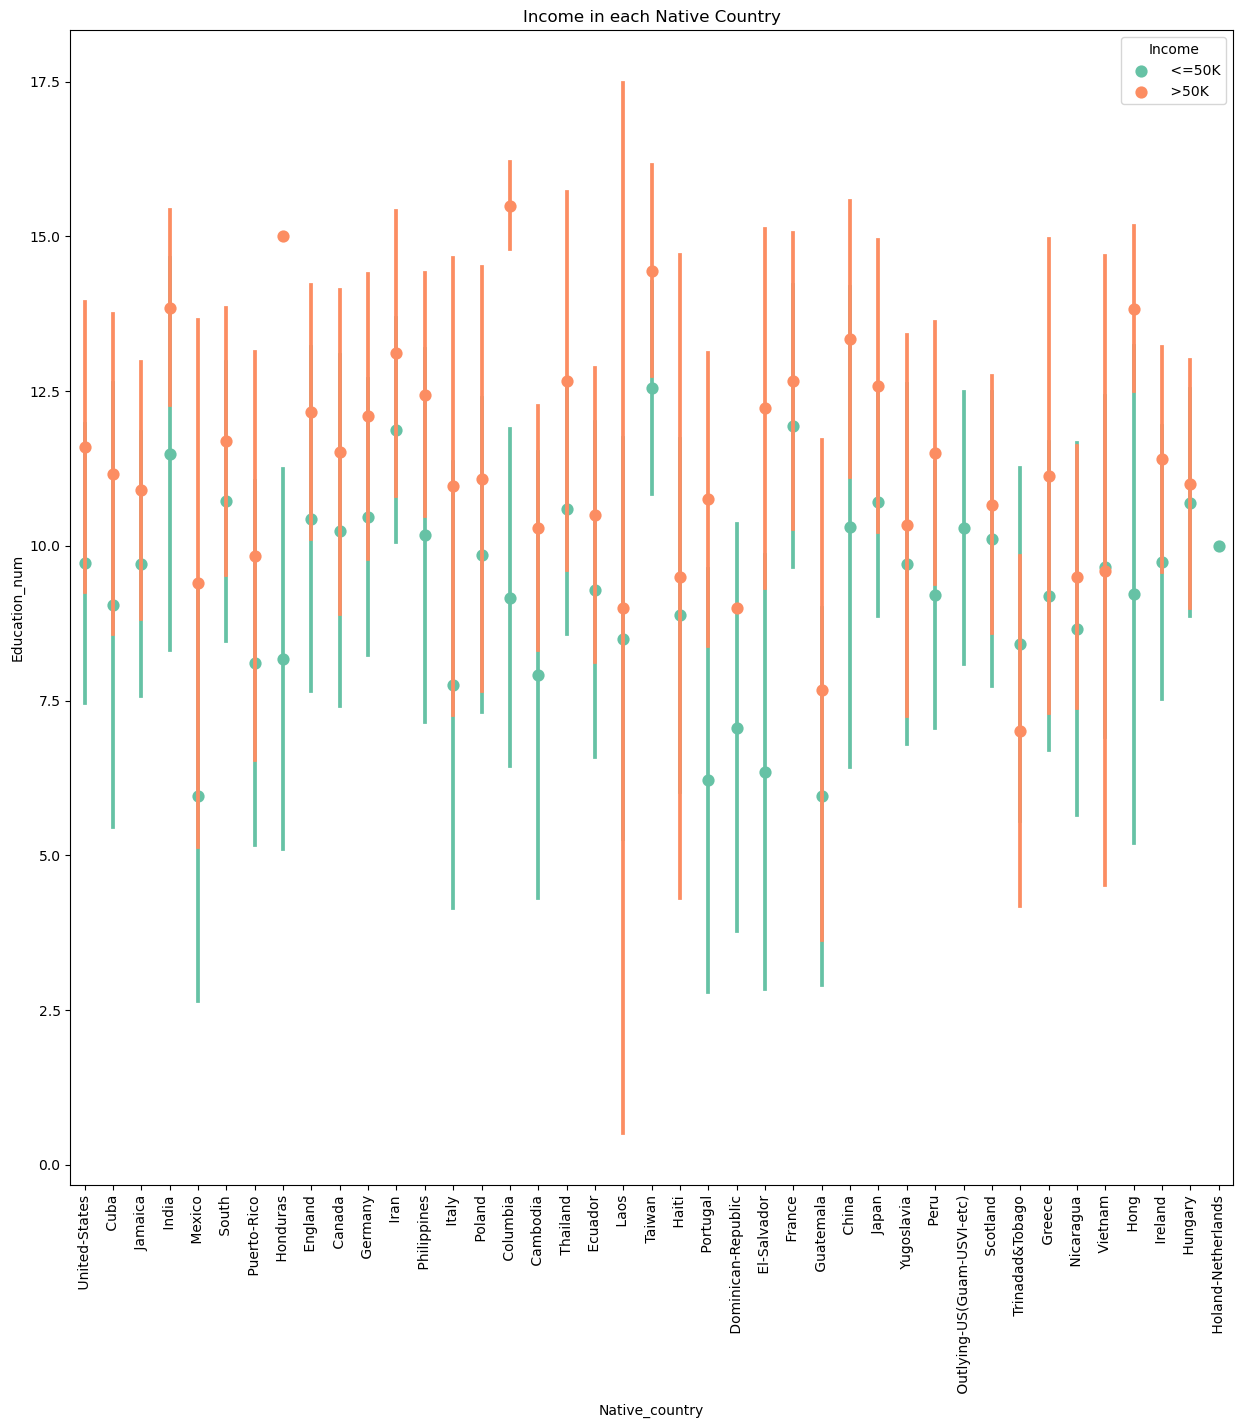

In [100]:
# visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title('Income in each Native Country')
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette='Set2',ci='sd')
plt.xticks(rotation=90)
plt.show()

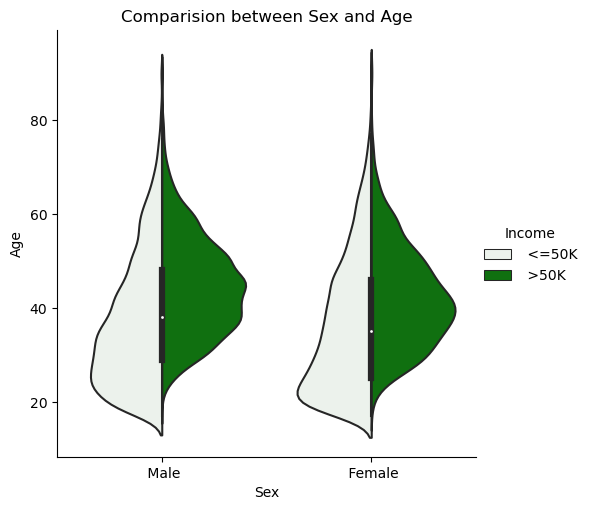

In [101]:
# visualizing the relationship between Sex and Age of the people

sns.catplot(x='Sex',y='Age', kind='violin',color='g',data=df,hue='Income',split=True)
plt.title("Comparision between Sex and Age")
plt.show()

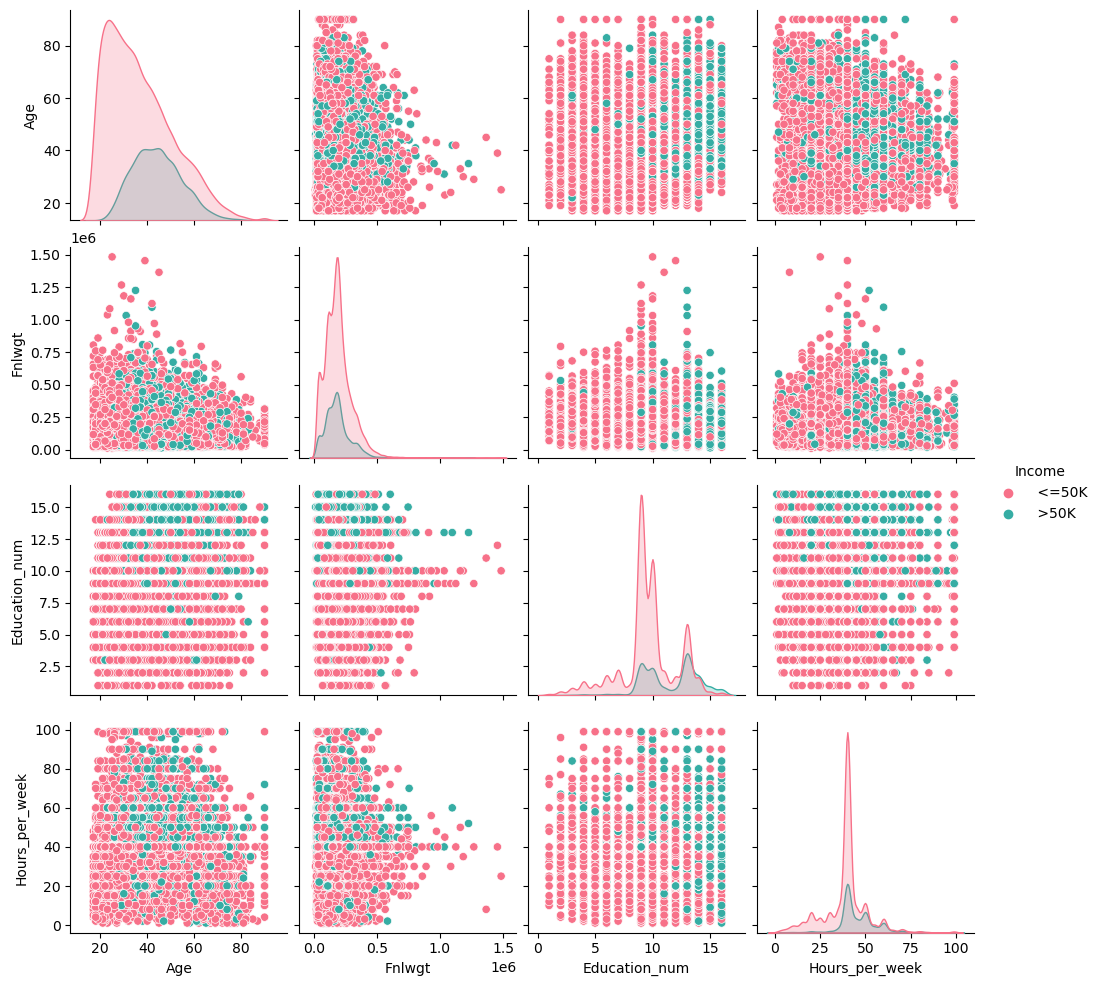

In [102]:
# checking the pairwise relation in the dataset.
sns.pairplot(df,hue='Income',palette='husl')

# Outliers Handling

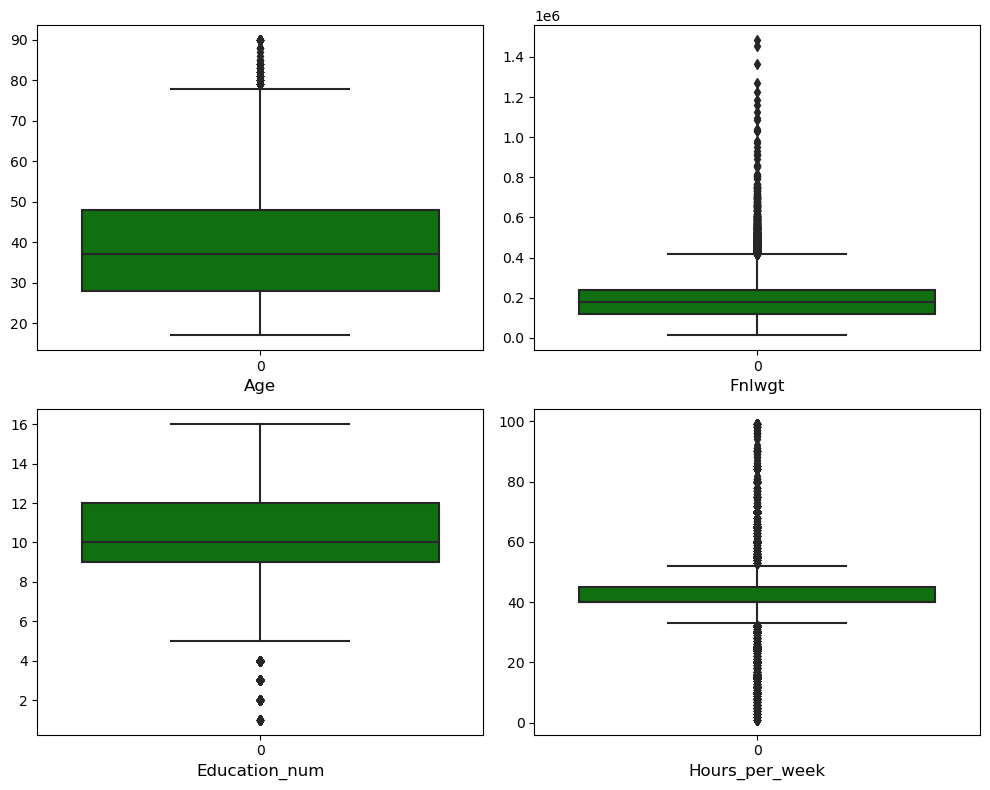

In [103]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers

In [104]:
features = df[['Age','Fnlwgt','Education_num','Hours_per_week']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [105]:
# creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-Sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-Sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-Sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-Sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [106]:
# shape of original dataset
df.shape

(32560, 13)

In [107]:
# shape of new dataframe
new_df.shape

(31461, 13)

In [108]:
# checking the data loss%
data_loss =(32560-31461)/32560*100

In [109]:
data_loss

3.3753071253071254

# IQR Method

In [110]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

IQR=Q3 - Q1

df1 = df[~((df <(Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [111]:
df1.shape

(21950, 13)

In [112]:
# checking the data loss %
data_loss = (32560-21950)/32560*100
data_loss

32.58599508599509

# Checking the skewness

In [113]:
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

# Removing Skewness

In [114]:
new_df['Fnlwgt'] = np.cbrt(df['Fnlwgt'])

In [115]:

new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

<Axes: xlabel='Fnlwgt', ylabel='Density'>

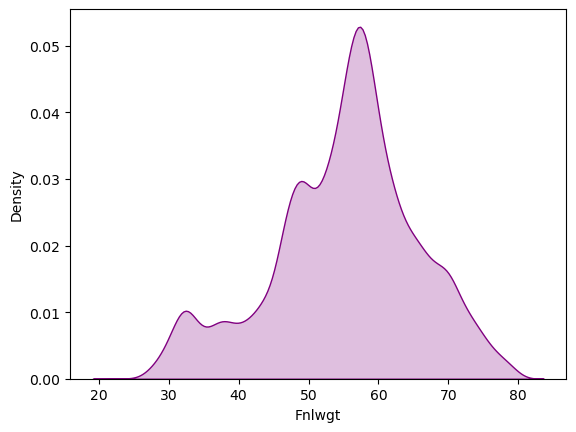

In [116]:
# After removing skewness. let's check how the data has been distributed in each column.
sns.distplot(new_df['Fnlwgt'],color='purple',kde_kws={'shade': True},hist=False)

# Encoding the categorical columns using Label Encoding

In [117]:
categorical_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

In [118]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,5,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,3,0,5,0,2,1,38,0
3,1,5,0,10,5,2,0,4,0
4,1,2,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,4,0,13,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


# Correlation between the target variable and independent variables using HEAT map

In [119]:
# checking the relation between features and the target
cor = new_df.corr()
cor


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083618,-0.062328,-0.068447,0.053361,-0.476050,0.000905,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083618,1.000000,0.021707,-0.049975,-0.161488,0.034265,-0.013300,0.001008,0.051670,0.036158,-0.006349,-0.031665,-0.062963
Fnlwgt,-0.062328,0.021707,1.000000,-0.006265,-0.031874,0.030462,0.002042,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.068447,-0.049975,-0.006265,1.000000,0.310261,0.052972,0.044347,0.000265,0.006002,-0.028825,-0.012020,-0.009356,0.085741
Education_num,0.053361,-0.161488,-0.031874,0.310261,1.000000,-0.071406,0.102128,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.034265,0.030462,0.052972,-0.071406,1.000000,-0.007819,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,0.000905,-0.013300,0.002042,0.044347,0.102128,-0.007819,1.000000,-0.046743,0.000417,0.051064,-0.000541,-0.002055,0.051945
Relationship,-0.268028,0.001008,0.009060,0.000265,-0.102497,0.451130,-0.046743,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.051670,-0.006959,0.006002,0.030849,-0.081701,0.000417,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036158,0.023307,-0.028825,0.016662,-0.336209,0.051064,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


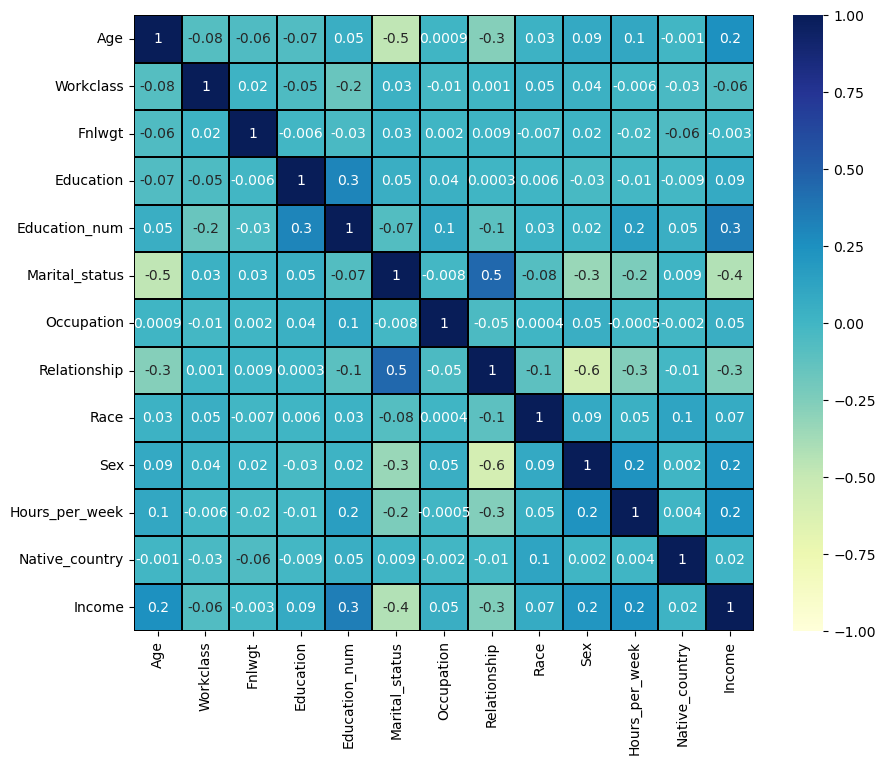

In [120]:
# visualizing the correlation matrix by plotting heat map
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1, vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor='black',annot_kws={'size':10},cmap='YlGnBu')
plt.yticks(rotation=0);

In [121]:

cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Education         0.085741
Race              0.072451
Occupation        0.051945
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

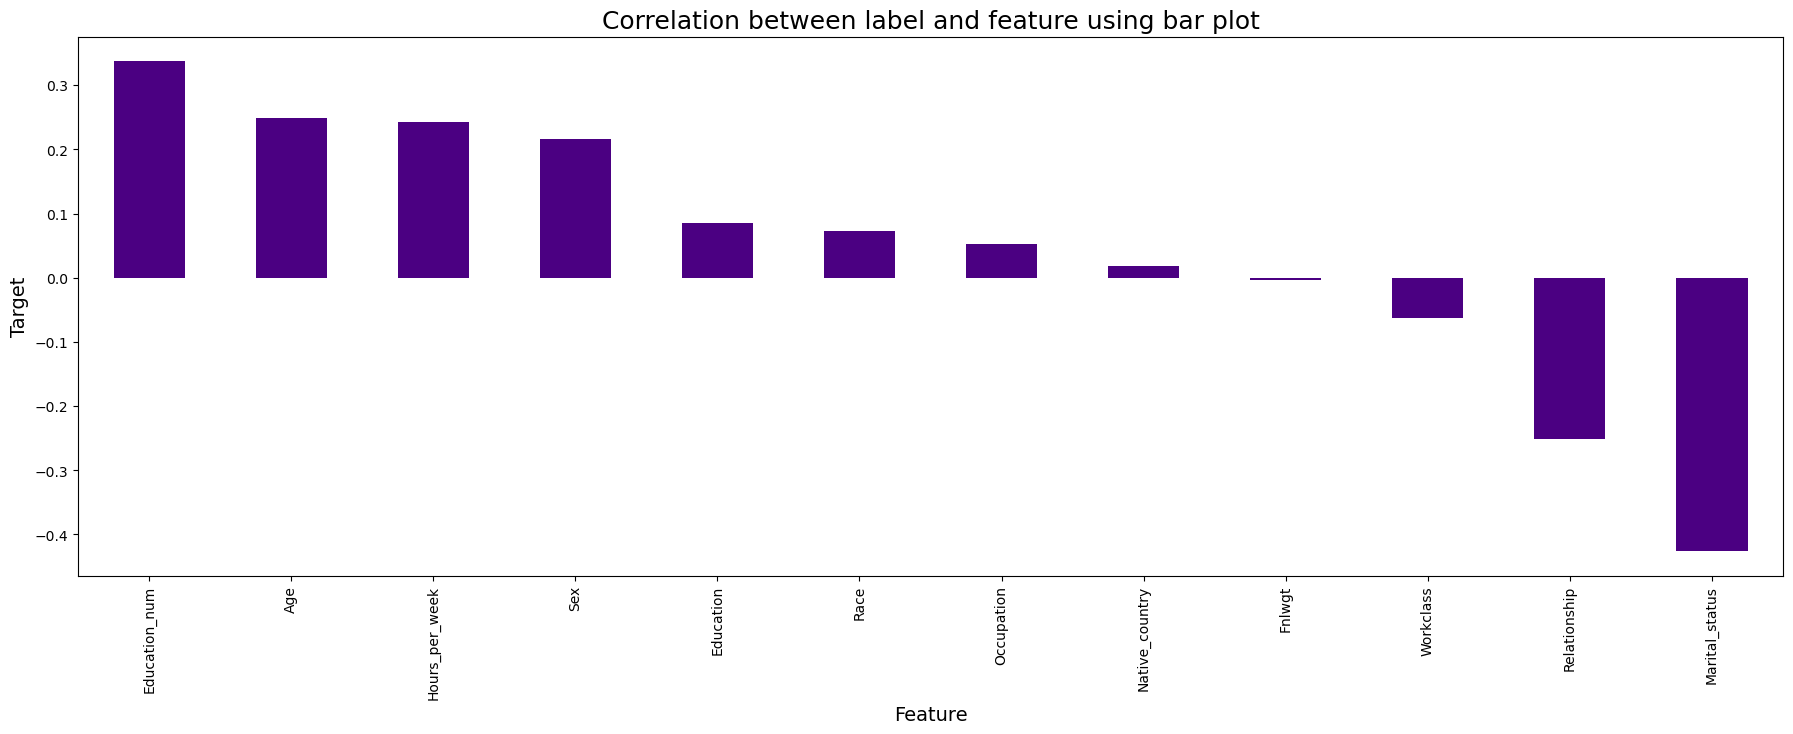

In [122]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Separating the features and label variables into x and y

In [123]:
x = new_df.drop('Income', axis=1)
y = new_df['Income']

In [124]:

x.shape

(31461, 12)

In [125]:

y.shape

(31461,)

# Feature Scaling using Standard Scalarization

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.392103,-1.102052,1.245592,1.154324,-0.990371,-0.785223,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.392103,0.464976,-1.277429,-0.459657,0.147158,-0.325029,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.392103,0.630260,0.236383,-1.266647,-0.990371,-0.325029,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.392103,1.399791,1.245592,1.154324,-0.990371,0.825456,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.392103,1.023711,-0.268221,1.557819,-0.990371,-0.785223,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.392103,0.814728,0.740988,0.750829,-0.990371,1.515747,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.392103,-0.143169,-1.277429,-0.459657,-0.990371,-0.094932,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.392103,-0.170768,-1.277429,-0.459657,0.147158,-1.475514,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.392103,0.335900,-1.277429,-0.459657,1.284688,-1.475514,0.960541,0.391304,0.706601,-1.797814,0.254062


# Oversampling

In [127]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [128]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

In [129]:
# dataframe after preprocessing and data cleaning
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,43.675121,5,13,0,3,0,4,1,13,38,0
1,38,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,1,61.685627,3,7,0,5,0,2,1,40,38,0
3,28,1,69.686283,5,13,0,10,5,2,0,40,4,0
4,37,1,65.776255,2,14,0,3,5,4,0,40,38,0


# Modeling
Finding best random state

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc =accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8397149245388486  on Random_state  71


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithm

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [133]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8391559530463947
[[6017 1147]
 [1155 5993]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7164
           1       0.84      0.84      0.84      7148

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.84     14312
weighted avg       0.84      0.84      0.84     14312



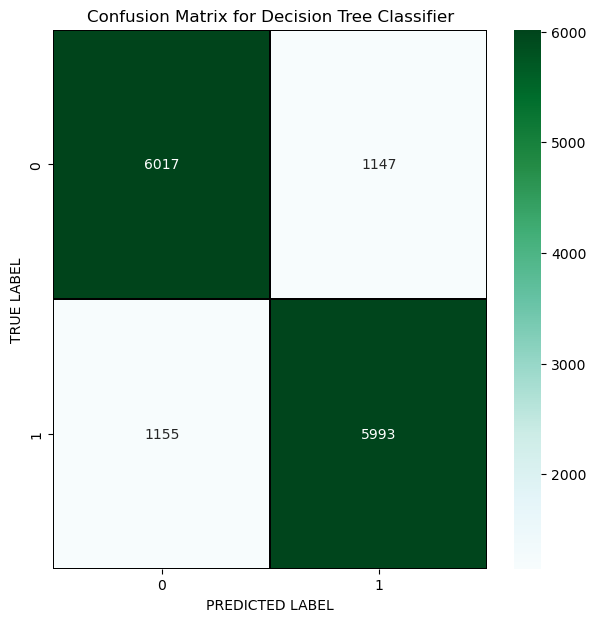

In [134]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Random Forest Classifier

In [135]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

#Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8815679150363331
[[6189  975]
 [ 720 6428]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7164
           1       0.87      0.90      0.88      7148

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



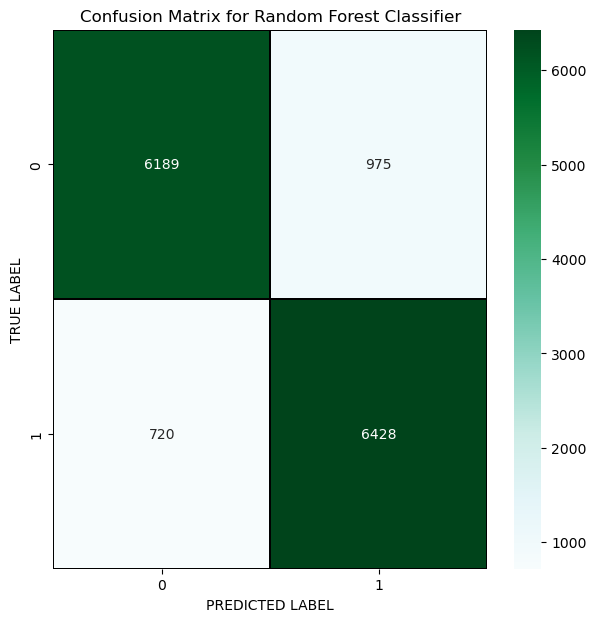

In [136]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Logistic Regression

In [137]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7976523197316937
[[5433 1731]
 [1165 5983]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      7164
           1       0.78      0.84      0.81      7148

    accuracy                           0.80     14312
   macro avg       0.80      0.80      0.80     14312
weighted avg       0.80      0.80      0.80     14312



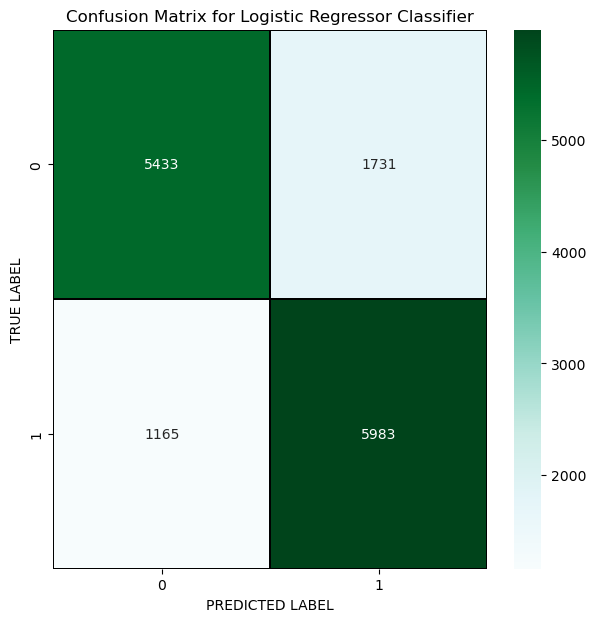

In [138]:
# let's plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Logistic Regressor Classifier")
plt.show()

# KNeighbores Classifier

In [139]:
knn = KNN()
knn.fit(x_train,y_train)

#Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8425796534376747
[[5462 1702]
 [ 551 6597]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7164
           1       0.79      0.92      0.85      7148

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



In [140]:
knn = KNN()
knn.fit(x_train,y_train)

#Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8425796534376747
[[5462 1702]
 [ 551 6597]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7164
           1       0.79      0.92      0.85      7148

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



# Gradient Boosting Classifier

In [142]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

#Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.852291783119061
[[5794 1370]
 [ 744 6404]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7164
           1       0.82      0.90      0.86      7148

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



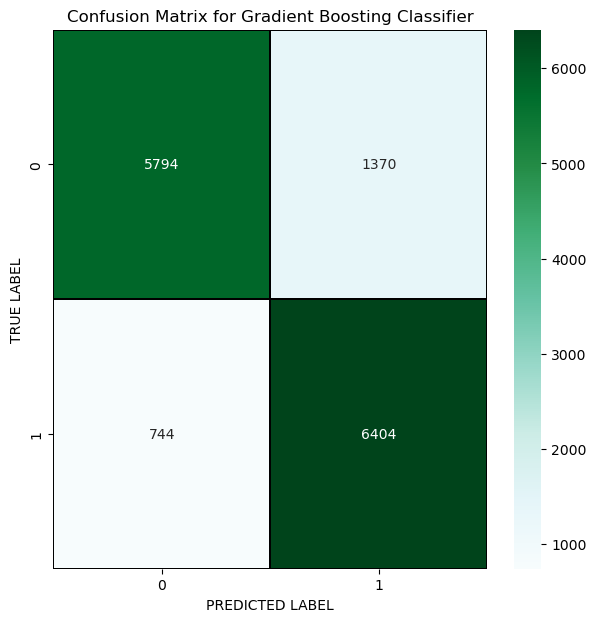

In [143]:
# let's plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Checking the Cross Validation Score

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8279482380875564


In [146]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC ,x,y,cv=5).mean())

0.8811484269008044


In [147]:
# cv score for Lofistic Regression Classifier
print(cross_val_score(LR ,x,y,cv=5).mean())

0.794386597607374


In [148]:
# cv score for KNN Classifier
print(cross_val_score( knn,x,y,cv=5).mean())

0.8470217680268839


In [151]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB ,x,y,cv=5).mean())

0.8460160850662248


# Hyper Parameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
# Decision Tree Classifier

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             'splitter':['best','random']}

In [154]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [157]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [156]:
GCV.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'splitter': 'best'}

In [158]:
census = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
census.fit(x_train,y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.64309670206819
